In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('USA_Housing.csv')

In [4]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
df.count()

Avg. Area Income                5000
Avg. Area House Age             5000
Avg. Area Number of Rooms       5000
Avg. Area Number of Bedrooms    5000
Area Population                 5000
Price                           5000
Address                         5000
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [7]:
df.drop('Address',inplace=True,axis=1)

In [8]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [9]:
#Supervised learning: Set of columns are x and y is single column.
#Keep columns which are required for predicting y. Remaining columns can be dropped.
#We want correlation of column x with y. But do not want correlation between columns of x.
#Avg. Area Number of Bedrooms and Avg. Area Number of Rooms are correlated so dropped that column. and this got from the heatmap.
#Drop column which had darker color.

In [10]:
df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


In [11]:
import seaborn as sns

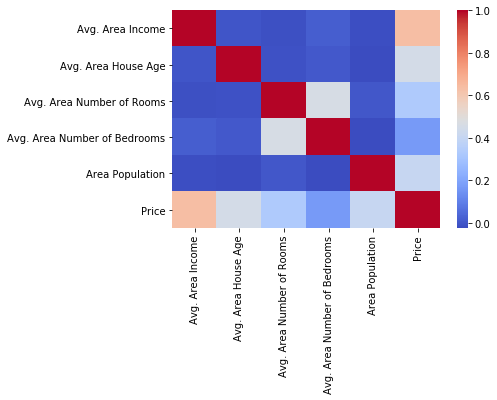

In [12]:
sns.heatmap(df.corr(),cmap='coolwarm')

In [13]:
df.drop('Avg. Area Number of Bedrooms',inplace=True,axis=1)

In [14]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,Price
0,79545.458574,5.682861,7.009188,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,26354.109472,6.309435e+05


In [15]:
df.mean()

Avg. Area Income             6.858311e+04
Avg. Area House Age          5.977222e+00
Avg. Area Number of Rooms    6.987792e+00
Area Population              3.616352e+04
Price                        1.232073e+06
dtype: float64

In [16]:
df.columns[:1]

Index(['Avg. Area Income'], dtype='object')

In [52]:
#All columns having values in different range. To make all column values in same range use standardascaler class of 
#sklearn.preprocessing.
#It will scale all the columns in same range.

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
ss = StandardScaler()

In [76]:
scaled_array = ss.fit_transform(df.drop('Price',axis = 1))

In [77]:
scaled_array

array([[ 1.02865969, -0.29692705,  0.02127433, -1.31759867],
       [ 1.00080775,  0.02590164, -0.25550611,  0.40399945],
       [-0.68462916, -0.11230283,  1.5162435 ,  0.07240989],
       ...,
       [-0.48723454,  1.28447022, -2.17026949, -0.29193658],
       [-0.05459152, -0.44669439,  0.14154061,  0.65111608],
       [-0.28831272,  0.01521477, -0.19434166,  1.04162464]])

In [86]:
X=pd.DataFrame(scaled_array, columns = df.columns[:-1])

In [103]:
y=df['Price']

In [113]:
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

In [87]:
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population
0,1.028660,-0.296927,0.021274,-1.317599
1,1.000808,0.025902,-0.255506,0.403999
2,-0.684629,-0.112303,1.516243,0.072410
3,-0.491499,1.221572,-1.393077,-0.186734
4,-0.807073,-0.944834,0.846742,-0.988387


In [81]:
from sklearn.model_selection import train_test_split

In [91]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [92]:
X_train.shape

(3500, 4)

In [93]:
y_train.shape

(3500,)

In [94]:
X_test.shape

(1500, 4)

In [95]:
y_test.shape

(1500,)

In [111]:
X_train.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population
2677,0.020823,0.119805,1.131878,0.461535
3094,-1.328263,1.223375,0.342380,1.801818
4745,-0.071511,-0.303338,0.225070,-0.792864
3084,1.062694,-0.254370,-0.539498,0.409734
3986,-0.814331,-0.856067,-1.318720,-0.098214


In [112]:
y_train.head()

2677    1.300362e+06
3094    1.598736e+06
4745    1.028966e+06
3084    1.495673e+06
3986    7.521681e+05
Name: Price, dtype: float64

In [109]:
from sklearn.linear_model import LinearRegression

In [110]:
lr = LinearRegression()

In [114]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [115]:
lr.coef_

array([229448.18915658, 164631.09631099, 122499.58775588, 149154.25253999])

In [116]:
lr.intercept_

1232807.343164372

In [117]:
ypred = lr.predict(X_test)

In [118]:
len(ypred)

1500

In [119]:
len(X_test)

1500

In [120]:
#From dataset-divides dataset into x - independent variable/features used for predictions
                                # y - Price(Feature to be predicted)
# X divided into X_train,X_test 
# y divided into y_train, y_test
# training data(x_train,y_train that 4 features and price column used to train model)
# X_test used to predict values and then compares this values with y_test
    

In [123]:
(y_test - ypred).head()

2305    180958.602443
3119    -13380.916239
3228    -71485.854363
2570    193688.662638
1177    -35248.113428
Name: Price, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


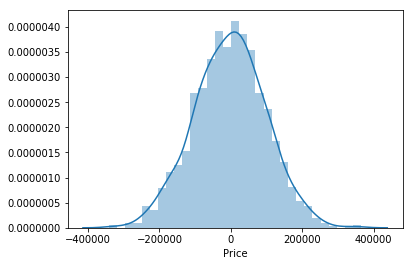

In [125]:
sns.distplot(y_test-ypred)

In [127]:
import matplotlib.pyplot as plt

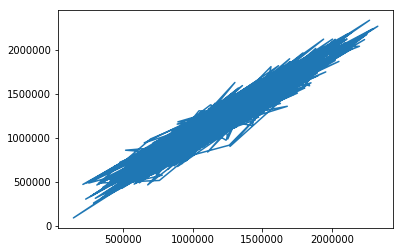

In [128]:
plt.plot(y_test,ypred)